In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats
from statannot import add_stat_annotation

from pltconfig import *

In [2]:
# Load bioreactor data 
# Culture density data from bioreactor pumping ambient air from 08/31/19.
# Note: first 19 rows are metadata for the experiment.
bioreactor_continuous_df = pd.read_csv('data/fig3/083119_CCMB1_bioreactor_continuous.csv', skiprows=19)
# Column names have whitespace off the machine - fix manually.
bioreactor_continuous_df.columns = [x.strip() for x in bioreactor_continuous_df.columns]

# Mapping of names to specific bioreactor tube labels.
bioreactor_mapping = {'recon.1': 'od-sensors-1.od-680 ',
                      'recon.2': 'od-sensors-2.od-680 ',
                      'recon.4': 'od-sensors-3.od-680 ',
                      'K194M.3': 'od-sensors-4.od-680 ',
                      'K194M.4': 'od-sensors-5.od-680 ',
                      'lsPrk.3': 'od-sensors-6.od-680 ',
                      'lsPrk.4': 'od-sensors-7.od-680 ',
                      'pos': 'od-sensors-8.od-680 ',
                     }

# Which ones to plot and colors for them.
bioreactor_names2plot = {'recon.4': purples[-2],
                         'lsPrk.3': greys[-3]}

In [3]:
# Endpoint data from 08/31/19 spark experiment. Produced from continuous data, endpoint is 80h. 
spark_endpoint_df = pd.read_csv('data/fig3/083119_CCMB1_ambient_OD80hrs_spark_blanked.csv', index_col=0, skipinitialspace=True)

# Groupings of samples for plotting spark endpoint data
all_names = spark_endpoint_df.replicate.unique()
exp = [c for c in all_names if c.startswith('rec')]
neg = [c for c in all_names if c.startswith('K194')]
neg_exp = [c for c in all_names if c.startswith('ls')]

# Colors to use for the spark endpoint data
replicates_palette = {}
replicates_palette.update([(n, greys[-1*i-1]) for i, n in enumerate(neg)])
replicates_palette.update([(n, greys[-1*i-1]) for i, n in enumerate(neg_exp)])
replicates_palette.update([(n, purples[-1*i-1]) for i, n in enumerate(exp)])

/Users/flamholz/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


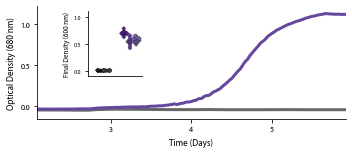

In [4]:
fig = plt.figure(figsize=(5, 2.25))

for name, color in sorted(bioreactor_names2plot.items()):
    # 'key' is the name of the measurement/well we are looking at. 
    key = bioreactor_mapping[name]
    my_tube = bioreactor_continuous_df[bioreactor_continuous_df['key'] == key]
    
    times = my_tube.time.values
    ods = pd.Series(my_tube.value.values)
    median_filtered_ods = ods.rolling(5).median()
    smoothed_ods = median_filtered_ods.rolling(10).mean()
    plt.plot(times, smoothed_ods, lw=3, color=color)

plt.xticks(np.arange(0, 144, 24), np.arange(0, 144, 24)//24, fontsize=8)
plt.yticks(np.arange(0.0, 1.01, 0.5), fontsize=8)

plt.xlim(50, 142)
plt.ylim(-0.15, 1.21)

plt.xlabel('Time (Days)', fontsize=9)
plt.ylabel('Optical Density (680 nm)', fontsize=9)
sns.despine()

# Inset for replicated endpoint data from the plate reader
ax0 = fig.get_axes()[0]
axins = inset_axes(ax0, width=0.75, height=0.9, loc=2,
                   bbox_to_anchor=(.15, .5, .6, .5),
                   bbox_transform=ax0.transAxes)


pal = {'Full CCM': greys[-3], 'Rub. alone': greys[-3]}
lr_order = ('Rub. alone', 'Full CCM')
sns.swarmplot(data=spark_endpoint_df, x='sample', y='OD', order=lr_order, ax=axins,
              palette=replicates_palette, size=3, hue='replicate', dodge=True, marker='D', edgecolor='k', linewidth=0.2)

plt.legend().set_visible(False)

plt.ylim(-0.1, 1.1)
plt.xlim(0, 1)
plt.xticks([])
plt.yticks(np.arange(0.0, 1.01, 0.5), fontsize=6)
plt.ylabel('Final Density (600 nm)', fontsize=7)
plt.xlabel('', fontsize=7)
sns.despine(ax=axins)
plt.tight_layout()

plt.savefig('fig3/fig3.png', dpi=600)
plt.show()
